In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import re
from sklearn.preprocessing import OneHotEncoder

In [12]:
titanic = pd.read_csv("./res/titanic/train.csv", index_col="PassengerId")
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Grouping

In [13]:
titanic.groupby(["Pclass", "Survived"]).size()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
dtype: int64

In [14]:
titanic.groupby(["Embarked", "Survived"]).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [15]:
titanic.groupby(["Sex", "Survived"]).size()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
dtype: int64

In [16]:
titanic.groupby(["Age", "Survived"]).size()

Age    Survived
0.42   1           1
0.67   1           1
0.75   1           2
0.83   1           2
0.92   1           1
1.00   0           2
       1           5
2.00   0           7
       1           3
3.00   0           1
       1           5
4.00   0           3
       1           7
5.00   1           4
6.00   0           1
       1           2
7.00   0           2
       1           1
8.00   0           2
       1           2
9.00   0           6
       1           2
10.00  0           2
11.00  0           3
       1           1
12.00  1           1
13.00  1           2
14.00  0           3
       1           3
14.50  0           1
                  ..
51.00  0           5
       1           2
52.00  0           3
       1           3
53.00  1           1
54.00  0           5
       1           3
55.00  0           1
       1           1
55.50  0           1
56.00  0           2
       1           2
57.00  0           2
58.00  0           2
       1           3
59.00  0          

## 이상치 확인

In [17]:
titanic["Age"]

PassengerId
1      22.0
2      38.0
3      26.0
4      35.0
5      35.0
6       NaN
7      54.0
8       2.0
9      27.0
10     14.0
11      4.0
12     58.0
13     20.0
14     39.0
15     14.0
16     55.0
17      2.0
18      NaN
19     31.0
20      NaN
21     35.0
22     34.0
23     15.0
24     28.0
25      8.0
26     38.0
27      NaN
28     19.0
29      NaN
30      NaN
       ... 
862    21.0
863    48.0
864     NaN
865    24.0
866    42.0
867    27.0
868    31.0
869     NaN
870     4.0
871    26.0
872    47.0
873    33.0
874    47.0
875    28.0
876    15.0
877    20.0
878    19.0
879     NaN
880    56.0
881    25.0
882    33.0
883    22.0
884    28.0
885    25.0
886    39.0
887    27.0
888    19.0
889     NaN
890    26.0
891    32.0
Name: Age, Length: 891, dtype: float64

In [18]:
ageNotNull = titanic[titanic["Age"].notnull()]["Age"]

([<matplotlib.axis.XTick at 0x2a7f9858550>],
 <a list of 1 Text xticklabel objects>)

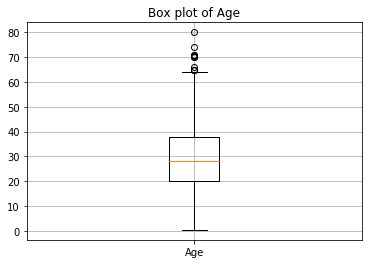

In [19]:
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.title('Box plot of Age')
plt.boxplot(ageNotNull, sym="o")
plt.grid()
plt.xticks([1], ["Age"])

## One-hotencoding 호칭

In [4]:
titanic["Name"]

PassengerId
1                                Braund, Mr. Owen Harris
2      Cumings, Mrs. John Bradley (Florence Briggs Th...
3                                 Heikkinen, Miss. Laina
4           Futrelle, Mrs. Jacques Heath (Lily May Peel)
5                               Allen, Mr. William Henry
6                                       Moran, Mr. James
7                                McCarthy, Mr. Timothy J
8                         Palsson, Master. Gosta Leonard
9      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
10                   Nasser, Mrs. Nicholas (Adele Achem)
11                       Sandstrom, Miss. Marguerite Rut
12                              Bonnell, Miss. Elizabeth
13                        Saundercock, Mr. William Henry
14                           Andersson, Mr. Anders Johan
15                  Vestrom, Miss. Hulda Amanda Adolfina
16                      Hewlett, Mrs. (Mary D Kingcome) 
17                                  Rice, Master. Eugene
18                 

In [20]:
p = re.compile("[A-Z][a-z]+[.]") # title을 추출하는 pattern
titanic["title"] = titanic["Name"].str.findall(p).str[0]
titanic[["Name", "title"]]

,Name,title
PassengerId,,
1,"Braund, Mr. Owen Harris",Mr.
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs.
3,"Heikkinen, Miss. Laina",Miss.
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs.
5,"Allen, Mr. William Henry",Mr.
6,"Moran, Mr. James",Mr.
7,"McCarthy, Mr. Timothy J",Mr.
8,"Palsson, Master. Gosta Leonard",Master.
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",Mrs.


In [21]:
titanic["title"].value_counts()

Mr.          517
Miss.        182
Mrs.         125
Master.       40
Dr.            7
Rev.           6
Major.         2
Col.           2
Mlle.          2
Countess.      1
Ms.            1
Capt.          1
Jonkheer.      1
Don.           1
Sir.           1
Lady.          1
Mme.           1
Name: title, dtype: int64

In [24]:
np.arange(titanic["title"].nunique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

In [25]:
title_dict = {"Mr.": 0, 
              "Miss.": 1, 
              "Mrs.": 2, 
              "Master.": 3,
              "Dr.": 4,
              "Rev.": 5,
              "Col.": 6,
              "Mlle.": 7,
              "Major.": 8,
              "Countess.": 9,
              "Ms.": 10,
              "Mme.": 11,
              "Don.": 12,
              "Capt.": 13,
              "Sir.": 14,
              "Lady.": 15,
              "Jonkheer.": 16}

In [26]:
title_dict.keys()

dict_keys(['Mr.', 'Miss.', 'Mrs.', 'Master.', 'Dr.', 'Rev.', 'Col.', 'Mlle.', 'Major.', 'Countess.', 'Ms.', 'Mme.', 'Don.', 'Capt.', 'Sir.', 'Lady.', 'Jonkheer.'])

## One-hotencoding 나이

In [27]:
bins = np.linspace(titanic.Age.min(), titanic.Age.max(), 8)
bins

array([ 0.42      , 11.78857143, 23.15714286, 34.52571429, 45.89428571,
       57.26285714, 68.63142857, 80.        ])

In [30]:
titanic["age_bin"] = np.digitize(titanic["Age"], bins)
titanic[["Age", "age_bin"]] # NaN값을 가지면 최대값으로 처리되는걸 알 수 있다

,Age,age_bin
PassengerId,,
1,22.0,2
2,38.0,4
3,26.0,3
4,35.0,4
5,35.0,4
6,NaN,8
7,54.0,5
8,2.0,1
9,27.0,3


In [36]:
# titanic["age_bin"] = np.where(titanic["Age"].notna(), titanic["age_bin"], None)
# titanic[["Age", "age_bin"]]

In [31]:
ohe = OneHotEncoder() 
ohe.fit(np.array(titanic[titanic["age_bin"].notnull()]["age_bin"]).reshape(-1, 1))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [43]:
ohe.transform(np.array(titanic["age_bin"]).reshape(-1, 1)).toarray()

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])